# Анализ данных для интернет-магазина по продажам компьютерных игр

**Описание проекта**

Популярность компьютерных игр на протяжении последних десятилетий только растет. Растет и игровое разнообразие, предлагаемых на рынке продуктов такого рода. Неудивительно, что площадки по продажам компьютерных игр хотят делать ставки на потенциально перспективные продукты и быть уверенными, что вложенные средства на продвижение той или иной игры, окупятся большими продажами и отзывами довольных клиентов.


**Цель исследования**

Выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных**

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

Мы имеем данные до 2016 года и планируем рекламную кампанию на 2017-й. Данные за 2016 год могут быть неполными.

Информация о данных:

  -  `Name` — название игры
  -  `Platform` —  платформа
  -  `Year_of_Release` — год выпуска
  -  `Genre` — жанр игры
  -  `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
  -  `EU_sales` — продажи в Европе (миллионы проданных копий)
  -  `JP_sales` —  продажи в Японии (миллионы проданных копий)
  -  `Other_sales` — продажи в других странах (миллионы проданных копий)
  -  `Critic_Score` — оценка критиков (максимум 100)
  -  `User_Score` — оценка пользователей (максимум 10)
  -  `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
  

**Ход исследования**

1. Импорт библиотек
2. Обзор данных:
    - Загрузка данных;
    - Ознакомление с данными: `head()`, `info()`, `describe()`;
    - *Вывод*: какие основные типы, наличие пропусков.
3. Предобработка данных:
    - Создание копии датасета;
    - Проверка названий столбцов, приведение к нижнему регистру;
    - Изучение и преобразование **типов данных**;
    - *Вывод*: причины замены типа данных, рекомендации по сбору данных;
    - Обработка **пропущенных значений**;
    - *Вывод*: возможные причины наличия пропусков, рекомендации по устранению;
    - Изучение и обработка **явных** и **неявных дубликатов**;
    - *Вывод*: возможные причины появления дубликатов, рекомендации по устранению;
    - Разбор значения аббревиатуру 'tbd' и описание способа его обработки;
    - Подсчет суммарных продаж во всех регионах и добавление их в отдельный столбец.
4. Исследовательсткий анализ данных:
    - Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?;
    - Как менялись продажи по платформам. Выбор платформы с наибольшими суммарными продажами и построение распределения по годам. За какой характерный срок появляются новые и исчезают старые платформы?;
    - Определение актуального периода в результате исследования предыдущих вопросов;
    - Какие платформы лидируют по продажам, растут или падают? Выбор нескольких потенциально прибыльных платформ;
    - Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описание результата;
    - Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построение диаграммы рассеяния и подсчет корреляцию между отзывами и продажами. Формулировка выводов;
    - Сопоставление выводов с продажами игр на других платформах;
    - Изучение общего распределения игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
5. Составление портрета пользователя каждого региона. Определение для пользователя каждого региона (NA, EU, JP):
    - Самые популярные платформы (топ-5). Описание различия в долях продаж;
    - Самые популярные жанры (топ-5). Пояснение разницы;
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе?
6. Проверка гипотез:
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные;
    - Пояснить как сформулированы нулевая и альтернативная гипотезы;
    - Какой критерий применен для проверки гипотез и почему.
- **Общий вывод**: описание результатов исследования, основных выводов и рекомендаций.

## Импорт используемых библиотек

In [ ]:
!pip install missingno

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import missingno as msno

## Обзор данных

In [ ]:
data_games = pd.read_csv('/datasets/games.csv')

### Ознакомление с данными

In [ ]:
#универсальная функция для ознакомления с данными
def data_review(data):
    '''
    data - DataFrame

    '''
    print('*'*10, 'The Original DataFrame', '*'*10)
    display(data.head())
    print('')
    print('')
    print('*'*10, 'General Information', '*'*10)
    print('')
    display(data.info())
    print('')
    print('')
    print('*'*10, 'Has NaN', '*'*10)
    display(data.isna().sum())
    print('*'*10, 'Has NaN Percentage (%)', '*'*10)
    display(((data.isna().sum() / data_games.shape[0]) * 100))
    print('')
    print('')
    print('*'*10, 'Descriptive Statistics', '*'*10)
    display(data.describe())

In [ ]:
data_review(data_games)

********** The Original DataFrame **********


Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN



********** General Information **********

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None



********** Has NaN **********


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

********** Has NaN Percentage (%) **********


Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64



********** Descriptive Statistics **********


Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        Other_sales  Critic_Score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000

**Произведем визулальную обработку пропущенных значений**

In [ ]:
msno.matrix(data_games, labels=True);

In [ ]:
msno.bar(data_games);

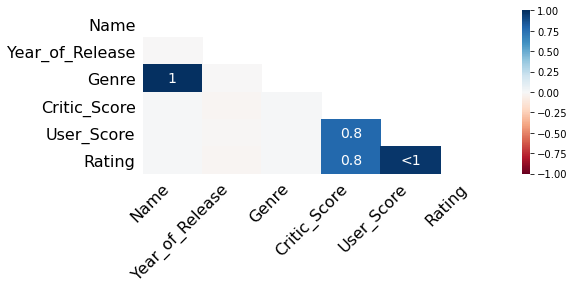

In [ ]:
msno.heatmap(data_games, figsize=(8,3));

**Выводы:**

- Названия столбцов содержат прописные буквы;
- Для столбцов `Year_of_Release`, `Critic_Score`, `User_Score` определены несоответствующие значениям типы данных;
- Данные содержат пропуски в 6 столбцах из 11, 3 из который в значительном количестве. Пропуски в столбцах `genre` и `name` имеют силу корреляции 1, а значит определены в одних и тех же строках. Пропуски в столбцах `Critic_Score` и `User_Score` также имеют сильную корреляцию.


<font color='orange'>**Предоставленные данные требуют дополнительной предобработки.**</font>

## Предобработка данных

Перед началом предобработки исходного датасета, пересохраним его в переменную *df_x*.

In [ ]:
df_games=pd.DataFrame(data_games)

### Обработка названий столбцов

Приведем названия столбцов к нижнему регистру:

In [ ]:
df_games.columns = df_games.columns.str.lower()

Проверим получившийся результат:

In [ ]:
df_games.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

### Преобразование типов данных

Для столбцов `year_of_release`, `critic_score`, `user_score` определены несоответствующие значениям типы данных. Приведем их в соответствие для более удобной обработки данных. Также переведем тип данных `float64` в `float32` для экономии вычислительной памяти.

1. Столбцы `year_of_release` и `critic_score` имеют тип данных `float64` и целочисленные данные. Переведем данные в тип `int32`.

In [ ]:
#df_games['year_of_release'] = df_games['year_of_release'].astype(np.int32)
#df_games['critic_score'] = df_games['critic_score'].astype(np.int32)

2. Столбец `user_score` имеет тип данных `object` и содержит тип данных `float`. Переведем данные в тип `float32`.

In [ ]:
#df_games['user_score'] = df_games['user_score'].astype(np.float32)

В первом случае преобразование не сработало, так как столбцы имеют пропущенные значения NaN, которые не поддерживаются типом данных `int32`. Во втором случае столбец `user_score` содержит аббревиатуру `tbd`, что означает to be determined = будет определено, и является строковым значением. Заменим аббревиатуру `tbd` на NaN, для возможности преобразования типа данных.

In [ ]:
df_games.loc[df_games['user_score'] == 'tbd', 'user_score'] = np.nan

Проверим, что значение 'tbd' заменено:

In [ ]:
df_games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Преобразуем тип данных в столбце `user_score`:

In [ ]:
df_games['user_score'] = df_games['user_score'].astype(np.float32)

Преобразуем данные в столбцах `na_sales`, `eu_sales`, `jp_sales`, `other_sales` и `critic_score` в тип `float32`

In [ ]:
df_games = df_games.astype(
    {
    'na_sales': np.float32,
    'eu_sales': np.float32,
    'jp_sales': np.float32,
    'other_sales': np.float32,
    'critic_score': np.float32,
    }
)

Проверим тип данных и количество пропущенных значений (должно увеличиться):

In [ ]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float32
 5   eu_sales         16715 non-null  float32
 6   jp_sales         16715 non-null  float32
 7   other_sales      16715 non-null  float32
 8   critic_score     8137 non-null   float32
 9   user_score       7590 non-null   float32
 10  rating           9949 non-null   object 
dtypes: float32(6), float64(1), object(4)
memory usage: 1.0+ MB


**Вывод:**

К обработке типов данных cтолбцов `year_of_release` и `critic_score` вернемся после обработки пропущенных значений.

### Обработка пропущенных значений

1. Посмотрим на пропущенные значение в столбцах `name` и `genre` их всего по 2 в каждом

In [ ]:
df_games.loc[df_games['name'].isna() & df_games['genre'].isna()]

name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08           NaN         NaN    NaN  
14244         0.00           NaN         NaN    NaN

Значения в столбцах пропущены в одних и тех же 2-х строках. Заменить их нечем, их количество минимально - удалим их из датасета.

In [ ]:
df_games.dropna(subset = ['name'], inplace=True)
df_games['name'].isna().sum()

0

Проверим, что удаленных строк всего 2

In [ ]:
df_games.shape[0]

16713

2. Столбец `year_of_release` содержит 1.6 % пропущенных значений. Очевидной замены для данных пропусков нет. Их удаление не приведет к потере большого количества наблюдений, просто удалим эти строки.

In [ ]:
df_games.dropna(subset = ['year_of_release'], inplace=True)
df_games['year_of_release'].isna().sum()

0

Проверим, количество оставшихся данных

In [ ]:
df_games.shape[0]

16444

3. Столбцы `critic_score` и `user_score` содержат около 50 % пропущенных значений. Их удаление приведет к потере большого количества данных, необходимых для дальнейшего исследования. Пропуски в данных столбцах оставим без изменения.

4. Столбец `rating` категориальным и содержит 40.5 % пропущенных значений. Их удаление приведет к потере большого количества данных, необходимых для дальнейшего исследования. Заменим пропуски в данных на значение "Unknown".

In [ ]:
df_games.loc[df_games['rating'].isna(), 'rating'] = 'Unknown'

Проверим внесенные изменения:

In [ ]:
df_games['rating'].isna().sum()

0

In [ ]:
df_games.head()

name platform  year_of_release         genre  \
0                Wii Sports      Wii           2006.0        Sports   
1         Super Mario Bros.      NES           1985.0      Platform   
2            Mario Kart Wii      Wii           2008.0        Racing   
3         Wii Sports Resort      Wii           2009.0        Sports   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   

    na_sales   eu_sales  jp_sales  other_sales  critic_score  user_score  \
0  41.360001  28.959999      3.77         8.45          76.0         8.0   
1  29.080000   3.580000      6.81         0.77           NaN         NaN   
2  15.680000  12.760000      3.79         3.29          82.0         8.3   
3  15.610000  10.930000      3.28         2.95          80.0         8.0   
4  11.270000   8.890000     10.22         1.00           NaN         NaN   

    rating  
0        E  
1  Unknown  
2        E  
3        E  
4  Unknown

**Вернемся к преобразованию типа данные в столбце `year_of_release`. Столбец `critic_score` преобразовать в тип данных `int32` не удастся, так как мы оставили в нем пропущенные значения.**

In [ ]:
df_games['year_of_release'] = df_games['year_of_release'].astype(np.int32)

Проверим итоговую общую информацию по датасету:

In [ ]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float32
 5   eu_sales         16444 non-null  float32
 6   jp_sales         16444 non-null  float32
 7   other_sales      16444 non-null  float32
 8   critic_score     7983 non-null   float32
 9   user_score       7463 non-null   float32
 10  rating           16444 non-null  object 
dtypes: float32(6), int32(1), object(4)
memory usage: 1.1+ MB


Посмотрим сколько данных утеряно в результате обработки пропущенных значений.

In [ ]:
round(100-((df_games.shape[0] / data_games.shape[0]) * 100), 1)

1.6

**Вывод: утеряно 1.6 % данных. Считаем данный процент приемлемым.**

### Обработка дубликатов

####  Обработка явных дубликатов

In [ ]:
df_games.duplicated().sum()

0

####  Обработка неявных дубликатов

Проверим колонки `platform` и `genre` на неявные дубликаты.

In [ ]:
df_games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
df_games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

**Выводы:**

Явные или неявные дубликаты не обнаружены.

### Подсчет суммарных продаж во всех регионах

Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.

In [ ]:
df_games['total_sales'] = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df_games.head()

name platform  year_of_release         genre  \
0                Wii Sports      Wii             2006        Sports   
1         Super Mario Bros.      NES             1985      Platform   
2            Mario Kart Wii      Wii             2008        Racing   
3         Wii Sports Resort      Wii             2009        Sports   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   

    na_sales   eu_sales  jp_sales  other_sales  critic_score  user_score  \
0  41.360001  28.959999      3.77         8.45          76.0         8.0   
1  29.080000   3.580000      6.81         0.77           NaN         NaN   
2  15.680000  12.760000      3.79         3.29          82.0         8.3   
3  15.610000  10.930000      3.28         2.95          80.0         8.0   
4  11.270000   8.890000     10.22         1.00           NaN         NaN   

    rating  total_sales  
0        E    82.539993  
1  Unknown    40.240002  
2        E    35.520000  
3        E    32.770000  
4  Unknown    31.380001

**Вывод:**

Данные готовы для дальнейшего исследовательского анализа.

## Исследовательский анализ данных

### Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Визуализируем данные по количеству выпущенных игр по годам.

In [ ]:
df_games.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

In [ ]:
df_games.groupby('year_of_release')['name'].count().plot(kind='bar', grid=True, figsize=(10, 5), color='g');

plt.title('Количеству выпущенных игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество выпущенных игр');

**Вывод:**

До 1994 года выпускалось до 60 игр в год, учитывая возраст выпущенных игр и их количество данными за эти годы можно не учитывать при проведении исследования.

### Как менялись продажи по платформам. Выбор платформ с наибольшими суммарными продажами и построение распределения по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Составим сводную таблицу

In [ ]:
platform_sales = df_games.pivot_table(
    index=['platform'],
    values=['total_sales'],
    aggfunc={'sum'},
)
platform_sales.columns = ['overall_sales_per_platform']
platform_sales.sort_values(by='overall_sales_per_platform', ascending=False)

overall_sales_per_platform
platform                            
PS2                      1233.559937
X360                      961.239990
PS3                       931.339966
Wii                       891.179993
DS                        802.780029
PS                        727.580017
PS4                       314.140015
GBA                       312.880005
PSP                       289.529999
3DS                       257.809998
PC                        255.759995
GB                        254.429993
XB                        251.569992
NES                       251.050003
N64                       218.009995
SNES                      200.039993
GC                        196.729996
XOne                      159.320007
2600                       86.480003
WiiU                       82.190002
PSV                        53.810001
SAT                        33.590000
GEN                        28.350000
DC                         15.950000
SCD                         1.860000
NG                          1.440000
WS                          1.420000
TG16                        0.160000
3DO                         0.100000
GG                          0.040000
PCFX                        0.030000

Построим столбцатую диаграмму

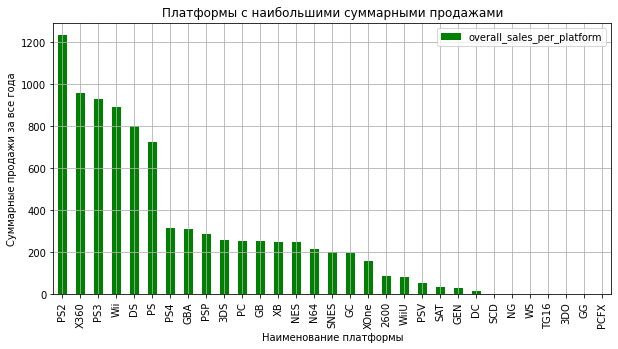

In [ ]:
(
    platform_sales
    .sort_values(by='overall_sales_per_platform', ascending=False)
    .plot(kind='bar', y='overall_sales_per_platform', grid=True, figsize=(10, 5), color='g')
)
plt.title('Платформы с наибольшими суммарными продажами')
plt.xlabel('Наименование платформы')
plt.ylabel('Суммарные продажи за все года');

Выберем 6 платформ с наибольшими продажами и посмотрим распределение по годам.

In [ ]:
top_platform = platform_sales.sort_values(by='overall_sales_per_platform', ascending=False).head(6)
top_platform

overall_sales_per_platform
platform                            
PS2                      1233.559937
X360                      961.239990
PS3                       931.339966
Wii                       891.179993
DS                        802.780029
PS                        727.580017

In [ ]:
top_platform_list = list(top_platform.index)
top_platform_list

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

In [ ]:
df_top_platform = df_games.query('platform.isin(@top_platform_list)')
df_top_platform.head()

name platform  year_of_release     genre   na_sales  \
0             Wii Sports      Wii             2006    Sports  41.360001   
2         Mario Kart Wii      Wii             2008    Racing  15.680000   
3      Wii Sports Resort      Wii             2009    Sports  15.610000   
6  New Super Mario Bros.       DS             2006  Platform  11.280000   
7               Wii Play      Wii             2006      Misc  13.960000   

    eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0  28.959999      3.77         8.45          76.0         8.0      E   
2  12.760000      3.79         3.29          82.0         8.3      E   
3  10.930000      3.28         2.95          80.0         8.0      E   
6   9.140000      6.50         2.88          89.0         8.5      E   
7   9.180000      2.93         2.84          58.0         6.6      E   

   total_sales  
0    82.539993  
2    35.520000  
3    32.770000  
6    29.799999  
7    28.910000

In [ ]:
top_platform_sales = df_top_platform.pivot_table(
    index=['platform', 'year_of_release'],
    values=['total_sales'],
    aggfunc={'sum'},
)
top_platform_sales.columns = ['sales_per_year']
top_platform_sales

sales_per_year
platform year_of_release                
DS       1985                   0.020000
         2004                  17.270000
         2005                 130.139999
         2006                 119.809998
         2007                 146.940002
...                                  ...
X360     2012                  99.739998
         2013                  88.580002
         2014                  34.740002
         2015                  11.960000
         2016                   1.520000

[67 rows x 1 columns]

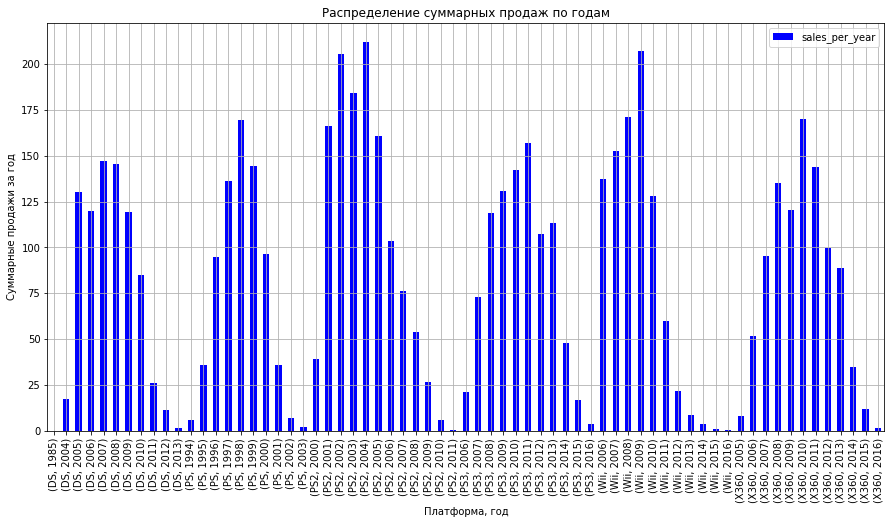

In [ ]:
(
    top_platform_sales
    .plot(kind='bar', y='sales_per_year', grid=True, figsize=(15, 7.5), color='b')
)
plt.title('Распределение суммарных продаж по годам')
plt.xlabel('Платформа, год')
plt.ylabel('Суммарные продажи за год');

**Вывод:**

Исходя из полученных графиков видно, что жизненный цикл платформы около 10 лет, а самые высокие продажи в середине ее существования. В целом платформе требуется 4-6 лет, чтобы выйти на пик продаж.


### Определение актуального периода в результате исследования предыдущих вопросов

Исходя из полученных выше данных, нас интересуют платформы, год выпуска которых после 2011 года. Для данных платформ на 2017 год будет приходится пик продаж.

In [ ]:
df_platform_bloom = df_games.query('year_of_release >= 2011')
df_platform_bloom.head()

name platform  year_of_release         genre  \
16              Grand Theft Auto V      PS3             2013        Action   
23              Grand Theft Auto V     X360             2013        Action   
29  Call of Duty: Modern Warfare 3     X360             2011       Shooter   
31       Call of Duty: Black Ops 3      PS4             2015       Shooter   
33             Pokemon X/Pokemon Y      3DS             2013  Role-Playing   

    na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
16      7.02      9.09      0.98         3.96          97.0         8.2   
23      9.66      5.14      0.06         1.41          97.0         8.1   
29      9.04      4.24      0.13         1.32          88.0         3.4   
31      6.03      5.86      0.36         2.38           NaN         NaN   
33      5.28      4.19      4.35         0.78           NaN         NaN   

     rating  total_sales  
16        M    21.049999  
23        M    16.270000  
29        M    14.730000  
31  Unknown    14.630000  
33  Unknown    14.599999

In [ ]:
df_platform_bloom_agg = df_platform_bloom.pivot_table(
    index='year_of_release',
    columns='platform',
    values=['total_sales'],
    aggfunc={'sum'},
    fill_value=0
)
df_platform_bloom_agg.columns = ['3DS','DS','PC' ,'PS2', 'PS3','PS4','PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']
df_platform_bloom_agg = df_platform_bloom_agg.reset_index()
df_platform_bloom_agg = df_platform_bloom_agg.set_index('year_of_release')
df_platform_bloom_agg

3DS     DS         PC   PS2         PS3         PS4  \
year_of_release                                                              
2011             63.199997  26.18  35.029999  0.45  156.779999    0.000000   
2012             51.360001  11.01  23.219999  0.00  107.360001    0.000000   
2013             56.570000   1.54  12.380000  0.00  113.250000   25.990000   
2014             43.759998   0.00  13.280001  0.00   47.759998  100.000000   
2015             27.780001   0.00   8.520000  0.00   16.820000  118.900002   
2016             15.140000   0.00   5.250000  0.00    3.600000   69.250000   

                   PSP        PSV        Wii       WiiU        X360       XOne  
year_of_release                                                                 
2011             17.82   4.630000  59.649998   0.000000  143.839996   0.000000  
2012              7.69  16.190001  21.710001  17.559999   99.739998   0.000000  
2013              3.14  10.590000   8.590000  21.650000   88.580002  18.960001  
2014              0.24  11.900000   3.750000  22.030001   34.740002  54.070000  
2015              0.12   6.250000   1.140000  16.350000   11.960000  60.139999  
2016              0.00   4.250000   0.180000   4.600000    1.520000  26.150000

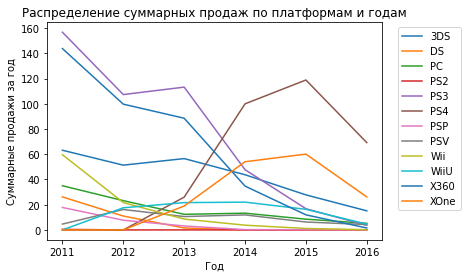

In [ ]:
df_platform_bloom_agg.plot()

plt.legend(bbox_to_anchor=(1.25 , 1 ), loc='upper right');

plt.title('Распределение суммарных продаж по платформам и годам')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи за год');

### Какие платформы лидируют по продажам, растут или падают? Выбор нескольких потенциально прибыльных платформ

Исходя из графика выше можно сделать вывод, что платформы PS2, X360, PS3, Wii, DS и PS, лидирующие по продажам в прошлые года, сейчас показывают плохие результаты. Платформа 3DS также находится на убывающем тренде продаж, хоть и имеет более высокие показатели.

В то время как платформа **PS4** (учитывая неполность данных за 2016 год) находится сейчас на стадии роста продаж и является потенциально прибыльной. Также, как потенциально прибыльную можно рассмотреть платформу **XOne**, аналогично находящуюся на стадии роста.

### Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описание результата

Построим ящики с усами по 5 наиболее перспективным платформам за актуальный период 2014-2016 годы.

In [ ]:
df_platform_bloom_top5 = df_games.query('year_of_release >= 2014 and platform.isin(["PS4", "XOne", "3DS", "X360", "PS3"])')
df_platform_bloom_top5.head()

name platform  year_of_release  \
31                  Call of Duty: Black Ops 3      PS4             2015   
42                         Grand Theft Auto V      PS4             2014   
47  Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS             2014   
77                                    FIFA 16      PS4             2015   
87               Star Wars Battlefront (2015)      PS4             2015   

           genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
31       Shooter      6.03      5.86      0.36         2.38           NaN   
42        Action      3.96      6.31      0.38         1.97          97.0   
47  Role-Playing      4.35      3.49      3.10         0.74           NaN   
77        Sports      1.12      6.12      0.06         1.28          82.0   
87       Shooter      2.99      3.49      0.22         1.28           NaN   

    user_score   rating  total_sales  
31         NaN  Unknown    14.630000  
42         8.3        M    12.620001  
47         NaN  Unknown    11.680000  
77         4.3        E     8.580000  
87         NaN  Unknown     7.980000

In [ ]:
sns.boxplot(data=df_platform_bloom_top5, x='platform', y='total_sales')

plt.title('Суммарные продажи в разбивке по платформам')
plt.suptitle('')
plt.xlabel('Платформы');
plt.ylabel('Миллионы проданных копий');

**Вывод**

На первом графике мы видим, что в каждой из выбранных пяти платформах есть супер популярные игры, которые сильно выбиваются из размаха "усов" по количеству суммарно проданных копий. Особенно это заметно на платформах `PS4` и `3DS`. Также мы можем заметить что на платформах `PS4` и `XOne` межквартильный размах и размах усов больше, а значит больше и число проданных копий среди большинства игр, не являющихся статистическими выбросами.  

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построение диаграммы рассеяния и подсчет корреляцию между отзывами и продажами. Формулировка выводов

Выведем матрицу корреляции в табличной форме и диаграммы рассеивания для самой популярной платформы PS3:

In [ ]:
PS3 = df_games.query('platform.isin(["PS3"])')

In [ ]:
sns.set(font_scale=1)
plt.figure(figsize=(10,5))
sns.heatmap(
    PS3.corr(),
    annot = True,
    vmin=-1, vmax=1, center= 0,
    cmap= 'RdBu_r');

plt.title('Матрица корреляции');

In [ ]:
sns.set(font_scale=1.0)
sns.scatterplot(
    data=PS3,
    x='critic_score',
    y='total_sales',
    )
plt.title('Зависимость общих продаж от оценки критиков');
plt.xlabel(
    'Оценка критиков (максимум 100)')
plt.ylabel(
    'Общие продажи');

In [ ]:
sns.set(font_scale=1.0)
sns.scatterplot(
    data=PS3,
    x='user_score',
    y='total_sales',
    )
plt.title('Зависимость общих продаж от оценки пользователей');
plt.xlabel(
    'Оценка пользователей (максимум 10)')
plt.ylabel(
    'Общие продажи');

**Выводы:**

1. Наблюдается средняя положительная корреляция 0.43 количества общих продаж от оценок критиков. Причем жителии Японии менее всего подвержены влиянию оценки критиков на решение о покупке игры.
2. Корреляция общих продаж от оценок пользователь практически отсутствует и составляет 0.13.

### Сопоставление выводов с продажами игр на других платформах.

Выведем матрицу корреляции в табличной форме и диаграммы рассеивания для двух отобранных нами потенциально прибыльных платформ:

In [ ]:
df_platform_bloom_top5.corr()

year_of_release  na_sales  eu_sales  jp_sales  other_sales  \
year_of_release         1.000000 -0.138276 -0.098160 -0.056480    -0.107264   
na_sales               -0.138276  1.000000  0.724003  0.219589     0.839493   
eu_sales               -0.098160  0.724003  1.000000  0.159204     0.932419   
jp_sales               -0.056480  0.219589  0.159204  1.000000     0.139965   
other_sales            -0.107264  0.839493  0.932419  0.139965     1.000000   
critic_score            0.084883  0.401679  0.307921  0.141620     0.349283   
user_score              0.044198 -0.041642 -0.038693  0.159586    -0.028056   
total_sales            -0.128494  0.906474  0.915296  0.384167     0.938907   

                 critic_score  user_score  total_sales  
year_of_release      0.084883    0.044198    -0.128494  
na_sales             0.401679   -0.041642     0.906474  
eu_sales             0.307921   -0.038693     0.915296  
jp_sales             0.141620    0.159586     0.384167  
other_sales          0.349283   -0.028056     0.938907  
critic_score         1.000000    0.553828     0.388020  
user_score           0.553828    1.000000    -0.023211  
total_sales          0.388020   -0.023211     1.000000

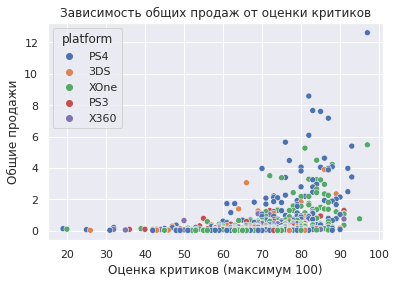

In [ ]:
sns.scatterplot(
    data=df_platform_bloom_top5,
    x='critic_score',
    y='total_sales',
    hue='platform'
)
plt.title('Зависимость общих продаж от оценки критиков');
plt.xlabel(
    'Оценка критиков (максимум 100)')
plt.ylabel(
    'Общие продажи');

Разобьем данные для более наглядного примера

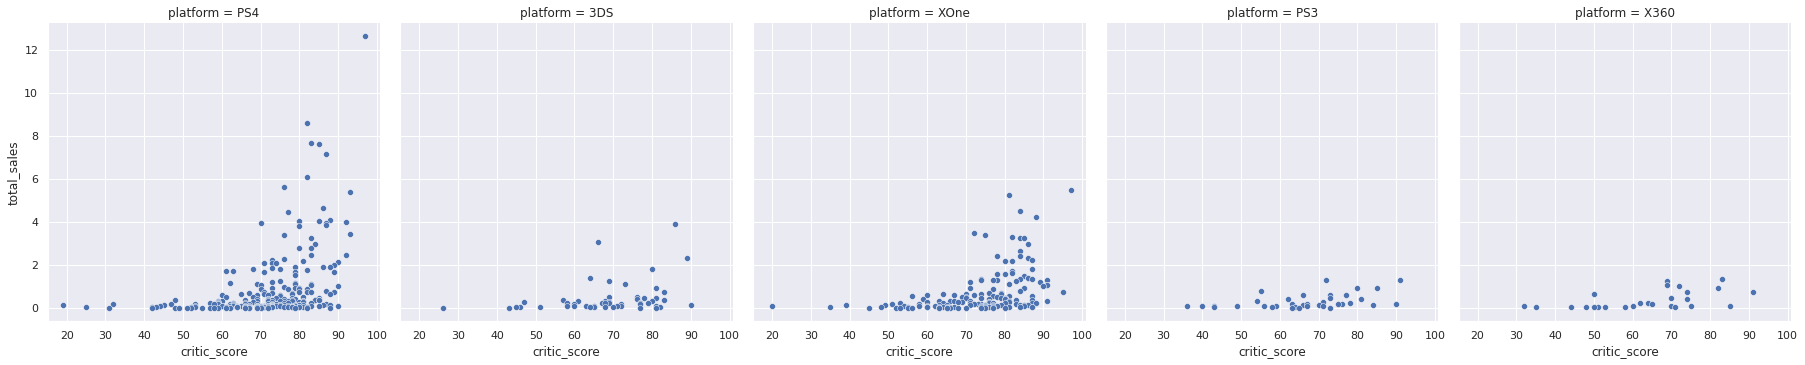

In [ ]:
sns.relplot(
    data=df_platform_bloom_top5,
    x='critic_score',
    y='total_sales',
    kind='scatter',
    col='platform'
);

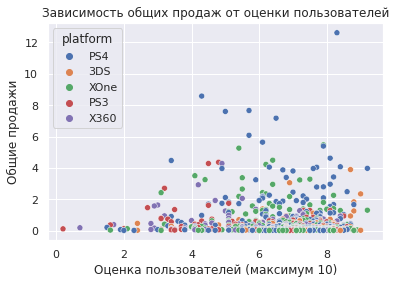

In [ ]:
sns.scatterplot(
    data=df_platform_bloom_top5,
    x='user_score',
    y='total_sales',
    hue='platform'
)
plt.title('Зависимость общих продаж от оценки пользователей');
plt.xlabel(
    'Оценка пользователей (максимум 10)')
plt.ylabel(
    'Общие продажи');

In [ ]:
sns.relplot(
    data=df_platform_bloom_top5,
    x='user_score',
    y='total_sales',
    kind='scatter',
    col='platform'
);

**Выводы:** исследовательский анализ других платформ подтверждает выводы, сделанные на основе самой популярной платформы.

### Изучение общего распределения игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Посмотрим распределение жанров по популярности на отобранных 5 платформах за последние 3 года. Учитывая наличие выбросов, рассмотрим медианные продажи по жанрам.

In [ ]:
genre_top5 = df_platform_bloom_top5.pivot_table(
    index=['genre'],
    values=['total_sales'],
    aggfunc={'median'}
)
genre_top5.columns = ['sales_per_genre_median']
genre_top5.reset_index()
genre_top5.sort_values(by='sales_per_genre_median', ascending=False)

sales_per_genre_median
genre                               
Shooter                        0.680
Sports                         0.280
Role-Playing                   0.165
Platform                       0.145
Fighting                       0.130
Racing                         0.125
Simulation                     0.120
Action                         0.115
Misc                           0.110
Adventure                      0.060
Puzzle                         0.060
Strategy                       0.060

In [ ]:
(
    genre_top5
    .sort_values(by='sales_per_genre_median', ascending=False)
    .plot(kind='bar', y='sales_per_genre_median', grid=True, figsize=(10, 5), color='g')
)
plt.title('Жанры с наибольшими медианными продажами')
plt.xlabel('Наименование жанра')
plt.ylabel('Медианные продажи за три года (млн. копий)');

Посмотрим распределение жанров по популярности на отобранных 5 платформах за последние 3 года с разделением по годам.

In [ ]:
genre_top5_years = df_platform_bloom_top5.pivot_table(
    index=['genre', 'year_of_release'],
    values=['total_sales'],
    aggfunc={'median'}
)
genre_top5_years.columns = ['sales_per_genre_median']
genre_top5_years = genre_top5_years.reset_index().sort_values(by='sales_per_genre_median', ascending=False)
genre_top5_years

genre  year_of_release  sales_per_genre_median
24       Shooter             2015                   1.205
12      Platform             2014                   1.020
23       Shooter             2014                   0.815
29        Sports             2014                   0.570
27    Simulation             2015                   0.340
0         Action             2014                   0.260
25       Shooter             2016                   0.260
10          Misc             2015                   0.250
18        Racing             2015                   0.240
17        Racing             2014                   0.200
9           Misc             2014                   0.190
22  Role-Playing             2016                   0.180
20  Role-Playing             2014                   0.165
21  Role-Playing             2015                   0.165
30        Sports             2015                   0.155
6       Fighting             2014                   0.150
31        Sports             2016                   0.140
7       Fighting             2015                   0.140
14      Platform             2016                   0.105
1         Action             2015                   0.100
13      Platform             2015                   0.090
8       Fighting             2016                   0.085
3      Adventure             2014                   0.080
34      Strategy             2016                   0.070
19        Racing             2016                   0.060
16        Puzzle             2015                   0.060
32      Strategy             2014                   0.060
33      Strategy             2015                   0.060
26    Simulation             2014                   0.055
15        Puzzle             2014                   0.055
5      Adventure             2016                   0.050
4      Adventure             2015                   0.050
2         Action             2016                   0.050
11          Misc             2016                   0.035
28    Simulation             2016                   0.020

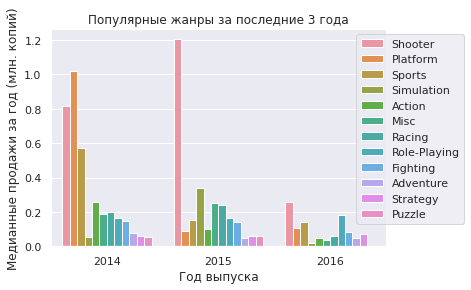

In [ ]:
sns.barplot(
    data=genre_top5_years,
    x='year_of_release',
    y='sales_per_genre_median',
    hue='genre',
);
plt.legend(bbox_to_anchor=(1.25 , 1 ), loc='upper right')
plt.title('Популярные жанры за последние 3 года')
plt.xlabel('Год выпуска')
plt.ylabel('Медианные продажи за год (млн. копий)');

**Выводы:**

1. Самые прибыльные жанры за все последние 3 года в порядке убывания - `Shooter`, `Sports` и `Role-Playing`. Причем жанр `Shooter` лидирует с большим отрывом. Наименее прибыльные - `Adventure`, `Puzzle` и `Stratagy`.

2. При более детельном рассмотрении по годам ситуация немного меняется:
- в 2014 году лидером среди жанров является жанр `Platform`, второе место занимет жанр `Shooter`, на третье место встал `Sports`;
- в 2015 году на первое место вышел жанр `Shooter` с сильным отрывом, за ним следует `Simulation`  и на третьем месте `Misc`.
- в 2016 жанр `Shooter` остается лидером продаж, на второе место пока выходит `Role-Playing`, преследуемый жанром `Sports`.
- наименее популярными жанрами за послежние 3 года являются `Puzzle`, `Stratagy` и `Adventure`, в 2016 году жанр `Puzzle` даже не вошел в игры, выпускаемые 5-кой лидирующих платформ.  

Однако имеем в виду, что данные за 2016 год неполные и ситуация еще может измениться.

## Составление портрета пользователя каждого региона. Определение для пользователя каждого региона (NA, EU, JP):

### Самые популярные платформы (топ-5). Описание различия в долях продаж.

Создадим датасет с самыми популярными платформами (топ-5) за последние 3 года.

In [ ]:
df_last_3_years = df_games.query('year_of_release >= 2014')

### Самые популярные платформы (топ-5). Описание различия в долях продаж.

**Посмотрим на соотношение популярности платформ в Северной Америке**

In [ ]:
top_5_last_3_years_na = df_last_3_years.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()
top_5_last_3_years_na

platform
PS4     98.610001
XOne    81.269997
X360    28.299999
3DS     22.639999
PS3     22.049999
Name: na_sales, dtype: float32

In [ ]:
top_5_last_3_years_na_list = list(top_5_last_3_years_na.index)
top_5_last_3_years_na_list

['PS4', 'XOne', 'X360', '3DS', 'PS3']

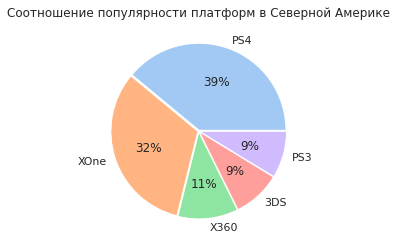

In [ ]:
colors = sns.color_palette('pastel')[ 0:5 ]
labels = top_5_last_3_years_na_list
plt.pie(top_5_last_3_years_na, explode = [0.01, 0.01, 0.01, 0.01, 0.01], colors = colors, autopct='%.0f%%', labels=labels)

plt.title('Соотношение популярности платформ в Северной Америке');

**Посмотрим на соотношение популярности платформ в Европе**

In [ ]:
top_5_last_3_years_eu = df_last_3_years.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()
top_5_last_3_years_eu

platform
PS4     130.039993
XOne     46.250000
PS3      25.539999
PC       17.969999
3DS      16.120001
Name: eu_sales, dtype: float32

In [ ]:
top_5_last_3_years_eu_list = list(top_5_last_3_years_eu.index)
top_5_last_3_years_eu_list

['PS4', 'XOne', 'PS3', 'PC', '3DS']

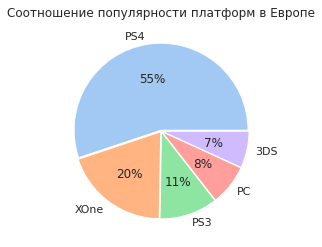

In [ ]:
colors = sns.color_palette('pastel')[ 0:5 ]
labels = top_5_last_3_years_eu_list
plt.pie(top_5_last_3_years_eu, explode = [0.01, 0.01, 0.01, 0.01, 0.01], colors = colors, autopct='%.0f%%', labels=labels)

plt.title('Соотношение популярности платформ в Европе');

**Посмотрим на соотношение популярности платформ в Японии**

In [ ]:
top_5_last_3_years_jp = df_last_3_years.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()
top_5_last_3_years_jp

platform
3DS     44.240002
PS4     15.020000
PSV     14.540000
PS3     11.220000
WiiU     7.310000
Name: jp_sales, dtype: float32

In [ ]:
top_5_last_3_years_jp_list = list(top_5_last_3_years_jp.index)
top_5_last_3_years_jp_list

['3DS', 'PS4', 'PSV', 'PS3', 'WiiU']

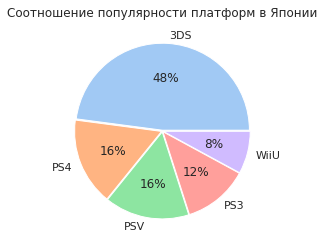

In [ ]:
colors = sns.color_palette('pastel')[ 0:5 ]
labels = top_5_last_3_years_jp_list
plt.pie(top_5_last_3_years_jp, explode = [0.01, 0.01, 0.01, 0.01, 0.01], colors = colors, autopct='%.0f%%', labels=labels)

plt.title('Соотношение популярности платформ в Японии');

**Выводы:**

1. В Сверевной Америке и Европе лидирующей платформой является платформа `PS4` c показателями доли в 39 % и 55 % соответсвенно. Причем мы видим, что в Европе популярность платформы `PS4` намного выше.
2. Второе место в Сверевной Америке и Европе занимает платформа `XOne` c показателями доли в 32 % и 20 % соответсвенно. Можно заметить, что в Северной Америке платформы `PS4` и `XOne` не сильно различаются в популярности.
3. Третье место в Северной Америке занимает платформа `X360` с долей в 11 %, причем в Европе и в Японии, данная в топ-5 вообще отсутствует.
4. В Японии наблюдаются существенные отличия: на первом месте здесь платформа `3DS` с показателем доли в 48 %, при это в Свеверной Америке и Европе на данную платформу приходится лишь 9 % и 7 % соответсвенно.
5. Самая популярна платформа в Сверевной Америке и Европе `PS4` в Японии занимает второе место с показателем в 16 %.
6. Третье место в Японии занимает платформа `PSV` с долей в 16 %, которая отсутсвует в топ-5 Северной Америки и Европы.

Итак, мы наблюдаем неоднородность в популярности платформ у пользователей различных регионов.

### Самые популярные жанры (топ-5). Пояснение разницы.

**Посмотрим на соотношение популярности жанров в Северной Америке**

In [ ]:
top_5_genre_last_3_years_na = df_last_3_years.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()
top_5_genre_last_3_years_na

genre
Shooter         79.019997
Action          72.529999
Sports          46.130001
Role-Playing    33.470001
Misc            15.050000
Name: na_sales, dtype: float32

In [ ]:
top_5_genre_last_3_years_na_list = list(top_5_genre_last_3_years_na.index)
top_5_genre_last_3_years_na_list

['Shooter', 'Action', 'Sports', 'Role-Playing', 'Misc']

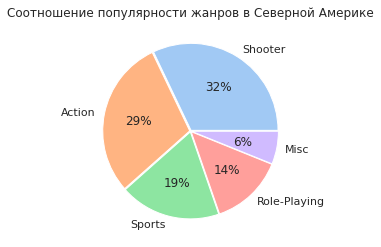

In [ ]:
colors = sns.color_palette('pastel')[ 0:5 ]
labels = top_5_genre_last_3_years_na_list
plt.pie(top_5_genre_last_3_years_na, explode = [0.01, 0.01, 0.01, 0.01, 0.01], colors = colors, autopct='%.0f%%', labels=labels)

plt.title('Соотношение популярности жанров в Северной Америке');

**Посмотрим на соотношение популярности жанров в Европе**

In [ ]:
top_5_genre_last_3_years_eu = df_last_3_years.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()
top_5_genre_last_3_years_eu

genre
Action          74.680000
Shooter         65.519997
Sports          45.730000
Role-Playing    28.170000
Racing          14.130000
Name: eu_sales, dtype: float32

In [ ]:
top_5_genre_last_3_years_eu_list = list(top_5_genre_last_3_years_eu.index)
top_5_genre_last_3_years_eu_list

['Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing']

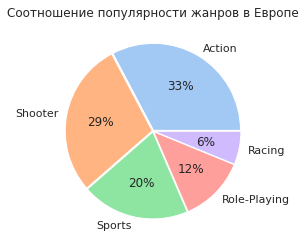

In [ ]:
colors = sns.color_palette('pastel')[ 0:5 ]
labels = top_5_genre_last_3_years_eu_list
plt.pie(top_5_genre_last_3_years_eu, explode = [0.01, 0.01, 0.01, 0.01, 0.01], colors = colors, autopct='%.0f%%', labels=labels)

plt.title('Соотношение популярности жанров в Европе');

**Посмотрим на соотношение популярности жанров в Японии**

In [ ]:
top_5_genre_last_3_years_jp = df_last_3_years.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()
top_5_genre_last_3_years_jp

genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float32

In [ ]:
top_5_genre_last_3_years_jp_list = list(top_5_genre_last_3_years_jp.index)
top_5_genre_last_3_years_jp_list

['Role-Playing', 'Action', 'Fighting', 'Misc', 'Shooter']

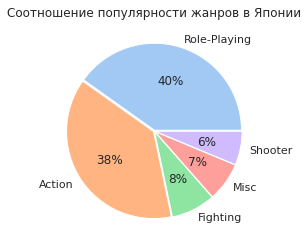

In [ ]:
colors = sns.color_palette('pastel')[ 0:5 ]
labels = top_5_genre_last_3_years_jp_list
plt.pie(top_5_genre_last_3_years_jp, explode = [0.01, 0.01, 0.01, 0.01, 0.01], colors = colors, autopct='%.0f%%', labels=labels)

plt.title('Соотношение популярности жанров в Японии');

**Выводы:**

Аналогично популярности платформ, мы наблюдаем неоднородность популярности жанров у пользователей различных регионов.

1. В Сверевной Америке и Европе лидирующие позиции делят `Shooter` и `Action` c показателями долей 29 % - 33 %.
2. Третье место в Сверевной Америке и Европе занимает жанр `Sports` 19 % и 20 % соответственно.
3. В Японии наблюдаются существенные отличия: на первом и втором местах здесь жанры `Role-Playing` и `Action` с показателями долей в 40 % и 38 % соответсвенно, при это в Свеверной Америке и Европе жанр `Role-Playing` лишь на 4 месте с показателями 14 % и 12 % соответственно.
4. На лидирующий в Сверевной Америке и Европе жанр `Shooter` в Японии приходится лишь 6 % от топа-5 жанров.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Составим сводную таблицу с продажами в регионах по рейтингу ESRB.

In [ ]:
esrb_sales = df_last_3_years.groupby('rating', dropna=False)[['na_sales', 'eu_sales', 'jp_sales']].sum()
esrb_sales = esrb_sales.reset_index()
esrb_sales

rating   na_sales   eu_sales   jp_sales
0        E  50.740002  58.060001   8.940000
1     E10+  33.230000  26.160000   4.460000
2        M  96.419998  93.440002   8.010000
3        T  38.950001  34.070000  14.780000
4  Unknown  64.720001  58.950001  56.900002

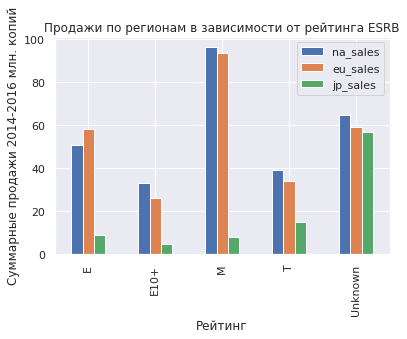

In [ ]:
esrb_sales.plot(x='rating', kind='bar');

plt.title('Продажи по регионам в зависимости от рейтинга ESRB')
plt.xlabel('Рейтинг')
plt.ylabel('Суммарные продажи 2014-2016 млн. копий');

**Выводы:**

1. Продажи в регионах Северной Америки и Европы схожи по своим параметрам в отношении рейтинга ESRB. Япония предсказуемо выделяется.
2. Северная Америка и Европа больше всего млн. копий игр продают с рейтингом ESRB Рейтинг ESRB: «M» («Mature») — «От 17 лет». Наименьшие продажи с рейтингом «E10+» («Everyone 10 and older») — «Для всех старше 10 лет».
3. Японский рынок более нацелен на потребителей с рейтингом Рейтинг ESRB: T («Teen»). Наименьшие продажи также приходятся на рейтинг «E10+» («Everyone 10 and older») — «Для всех старше 10 лет».
4. В целом для большой доли игр рейтинг не известен, а, следовательно, распределение продаж по рейтингу может иметь совсем другой вид.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем гипотезы:

$H_{0}$: "Средние пользовательские рейтинги платформ Xbox One и PC равны";

$H_{1}$: "Средние пользовательские рейтинги платформ Xbox One и PC неравны".

Проверим гипотезы:

In [ ]:
df_xone_user_score = df_last_3_years.query('platform == "XOne" and not(user_score.isnull())')

In [ ]:
df_pc_user_score = df_last_3_years.query('platform == "PC" and not(user_score.isnull())')

In [ ]:
alpha = .05 #уровень статистической значимости примем 0.05

results = st.ttest_ind(
    df_xone_user_score['user_score'],
    df_pc_user_score['user_score'],
    equal_var=False
)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.11601545900050317
Нет оснований отвергнуть нулевую гипотезу


**Вывод:**

Проведенный t-тест показал значение p-value: 0.11601398086668832, что не позволяет нам отвергнуть нулевую гипотезу $H_{0}$ в пользу альтернативной $H_{1}$, следовательно можно сделать вывод, что средние пользовательские рейтинги платформ Xbox One и PC равны.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Сформулируем гипотезы:

$H_{0}$: "Средние пользовательские рейтинги жанров Action и Sports равны";

$H_{1}$: "Средние пользовательские рейтинги жанров Action и Sports неравны".

Проверим гипотезы:

In [ ]:
df_action_user_score = df_last_3_years.query('genre == "Action" and not(user_score.isnull())')

In [ ]:
df_sports_user_score = df_last_3_years.query('genre == "Sports" and not(user_score.isnull())')

In [ ]:
alpha = .05 #уровень статистической значимости примем 0.05

results = st.ttest_ind(
    df_action_user_score['user_score'],
    df_sports_user_score['user_score'],
    equal_var=False
)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.1825638224397033e-14
Отвергаем нулевую гипотезу


**Вывод:**

Проведенный t-тест показал значение p-value: 1.1825550382644557e-14, что позволяет нам отвергнуть нулевую гипотезу $H_{0}$ в пользу альтернативной $H_{1}$, следовательно можно сделать вывод, что Средние пользовательские рейтинги жанров Action и Sports неравны.

### Как сформулированы нулевая и альтернативная гипотезы

Для проверки гипотезы о равенстве средних двух генеральных совокупностей формулируют нулевую гипотезу о том, что средние двух генеральных совокупносте равны и альтернативную гипотезу, что средние двух генеральных совокупностей не равны.

Также можно сформулировать односторонюю альтенативную гипотезу, как утверждения, что "среднее значение первой генеральной совокупности больше среднего значения второй генеральной совокупности" или "среднее значение первой генеральной совокупности меньше среднего значения второй генеральной совокупности".

### Какой критерий применен для проверки гипотез и почему?

Для проверки гипотез применен критерий Стьюдента (t-тест) (ttest_ind) для сравнения средних значений двух независимых выборок, по результатам которого можно сделать выводы о равенстве или различии исследуемых средних. Критерий Стьюдента изначально предполагается для выборок меньших размеров, при которых распределение немного шире нормальных, однако он также работает для выборок любого размера.

## Общий вывод

**Общие сведения**

---
Проведенный анализ данных выявил определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Был составлен портрет пользователя каждого региона (NA, EU, JP), также формулированы и проверены гипотезы о средних пользовательских рейтингах двух конкретных платформ и жанров.   


**Исходные данные и предобработка**

---

В исследовании был использован датасет из открытых источников - исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.

Имеются данные до 2016 года, рекламная кампанию планируется на 2017-й. Данные за 2016 год могут быть неполными.

 - Названия столбцов приведены к нижнему регистру.
 - В исходном датасете отсутствовали присутствовали ***пропущенные значения*** в 6 столбцах из 11, 3 из который в значительном количестве. Пропуски в столбцах `genre` и `name` имеют силу корреляции 1, а значит определены в одних и тех же строках. Пропуски в столбцах `Critic_Score` и `User_Score` также имеют сильную корреляцию. Удалены пропуски в столбцах `name` и `genre` в количестве 2-х строк, в столбце `year_of_release` в количестве 269 строк. Пропуски в столбцах `critic_score` и `user_score` оставлены без обработки. Итоговая потеря данных составила 1.6 %.    
 - ***Тип данных*** для столбца `year_of_release` переведен в тип данных `int32`. Типы данных столбцов `float64` переведены в `float32` для экономии вычислительной памяти. Столбец `critic_score` оставлен в типе данных `float32`, так как содержит значения NaN и не может быть переведен в тип данных `int32`.

 - ***Явных*** или ***неявных дубликатов*** не обнаружено.
 - Данные обогащены информацией о суммарных продажах во всех регионах - добавлен столбец - `total_sales`.

**Исследовательский анализ данных**

В результате проведенного исследовательского анализа данных было выявлено низкое количество игр, выпускавшиеся до 1994 года. Также определен примерный жизненный цикл каждой платформы - около 10 лет, а самые высокие продажи в середине ее существования. В целом платформе требуется 4-6 лет, чтобы выйти на пик продаж.

**1. Определение потенциально прибыльных платформ**

Актуальный период для поиска **потенциально перспективных платформ** обозначен от 2011 года. Для данных платформ на 2017 год будет приходится пик продаж. Актуальный период для исследования принять 2014-2016 годы.

**Вывод**

Исходя из графиков можно сделать вывод, что платформы PS2, X360, PS3, Wii, DS и PS, лидирующие по продажам в прошлые года, сейчас показывают плохие результаты. Платформа 3DS, и раньше не показывающая выдающихся результатов, также находится на закате продаж.

В то время как платформа `PS4` (учитывая неполность данных за 2016 год) находится сейчас на стадии роста продаж и является потенциально прибыльной. Также, как потенциально прибыльную можно рассмотреть платформу `XOne`, аналогично находящуюся на стадии роста.

В каждой из отобранных 5-ти платформах `PS4`, `XOne`, `3DS`, `X360`, `PS3` с наибольшим количеством продаж в актуальный период есть супер популярные игры, которые сильно выбиваются из размаха "усов" по количеству суммарно проданных копий. Особенно это заметно на платформах `PS4` и `3DS`. Также мы можем заметить что на платформах `PS4` и `XOne` межквартильный размах и размах усов больше, а значит больше и число проданных копий среди большинства игр, не являющихся статистическими выбросами.

**2. Определение зависимости между отзывами пользователей и критиков и количества продаж**

**Выводы:**

1. На самой популярной платформе наблюдается средняя положительная корреляция 0.43 количества общих продаж от оценок критиков. Причем жителии Японии менее всего подвержены влиянию оценки критиков на решение о покупке игры.
2. Корреляция общих продаж от оценок пользователь практически отсутствует и составляет 0.13.
3. Анализ других платформ подтверждает выводы, сделанные на основе самой популярной платформы.

**3. Выявление прибыльных жанров**

**Выводы:**

1. Самые прибыльные жанры за все последние 3 года в порядке убывания - `Shooter`, `Sports` и `Role-Playing`. Причем жанр `Shooter` лидирует с большим отрывом. Наименее прибыльные - `Adventure`, `Puzzle` и `Stratagy`.


2. При более детельном рассмотрении по годам ситуация немного меняется:
- в 2014 году лидером среди жанров является жанр `Platform`, второе место занимет жанр `Shooter`, на третье место встал `Sports`;
- в 2015 году на первое место вышел жанр `Shooter` с сильным отрывом, за ним следует `Simulation`  и на третьем месте `Misc`.
- в 2016 жанр `Shooter` остается лидером продаж, на второе место пока выходит `Role-Playing`, преследуемый жанром `Sports`.
- наименее популярными жанрами за послежние 3 года являются `Puzzle`, `Stratagy` и `Adventure`, в 2016 году жанр `Puzzle` даже не вошел в игры, выпускаемые 5-кой лидирующих платформ.  

Однако имеем в виду, что данные за 2016 год неполные и ситуация еще может измениться.   

**4. Портрет пользователя каждого региона ((NA, EU, JP)**

***4.1 Самые популярные платформы (топ-5)***

**Выводы:**

1. В Сверевной Америке и Европе лидирующей платформой является платформа `PS4` c показателями доли в 39 % и 55 % соответсвенно. Причем мы видим, что в Европе популярность платформы `PS4` намного выше.
2. Второе место в Сверевной Америке и Европе занимает платформа `XOne` c показателями доли в 32 % и 20 % соответсвенно. Можно заметить, что в Северной Америке платформы `PS4` и `XOne` не сильно различаются в популярности.
3. Третье место в Северной Америке занимает платформа `X360` с долей в 11 %, причем в Европе и в Японии, данная в топ-5 вообще отсутствует.
4. В Японии наблюдаются существенные отличия: на первом месте здесь платформа `3DS` с показателем доли в 48 %, при это в Свеверной Америке и Европе на данную платформу приходится лишь 9 % и 7 % соответсвенно.
5. Самая популярна платформа в Сверевной Америке и Европе `PS4` в Японии занимает второе место с показателем в 16 %.
6. Третье место в Японии занимает платформа `PSV` с долей в 16 %, которая отсутсвует в топ-5 Северной Америки и Европы.

Итак, мы наблюдаем неоднородность в популярности платформ у пользователей различных регионов.

***4.2 Самые популярные жанры (топ-5)***

**Выводы:**

Аналогично популярности платформ, мы наблюдаем неоднородность популярности жанров у пользователей различных регионов.

1. В Сверевной Америке и Европе лидирующие позиции делят `Shooter` и `Action` c показателями долей 29 % - 33 %.
2. Третье место в Сверевной Америке и Европе занимает жанр `Sports` 19 % и 20 % соответственно.
3. В Японии наблюдаются существенные отличия: на первом и втором местах здесь жанры `Role-Playing` и `Action` с показателями долей в 40 % и 38 % соответсвенно, при это в Свеверной Америке и Европе жанр `Role-Playing` лишь на 4 месте с показателями 14 % и 12 % соответственно.
4. На лидирующий в Сверевной Америке и Европе жанр `Shooter` в Японии приходится лишь 6 % от топа-5 жанров.

***4.3 Влияние рейтинга ESRB на продажи в отдельном регионе***

**Выводы:**

1. Продажи в регионах Северной Америки и Европы схожи по своим параметрам в отношении рейтинга ESRB. Япония предсказуемо выделяется.
2. Северная Америка и Европа больше всего млн. копий игр продают с рейтингом ESRB Рейтинг ESRB: «M» («Mature») — «От 17 лет». Наименьшие продажи с рейтингом «E10+» («Everyone 10 and older») — «Для всех старше 10 лет».
3. Японский рынок более нацелен на потребителей с рейтингом Рейтинг ESRB: T («Teen»). Наименьшие продажи также приходятся на рейтинг «E10+» («Everyone 10 and older») — «Для всех старше 10 лет».
4. В целом для большой доли игр рейтинг не известен, а, следовательно, распределение продаж по рейтингу может иметь совсем другой вид.


 **3. Проверка гипотез**
    
***3.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.***
  
**Вывод**

Проведенный t-тест показал значение p-value: 0.11601398086668832, что не позволяет нам отвергнуть нулевую гипотезу $H_{0}$ в пользу альтернативной $H_{1}$, следовательно можно сделать выод, что средние пользовательские рейтинги платформ Xbox One и PC равны.

***3.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.***

**Вывод:**

Проведенный t-тест показал значение p-value: 1.1825550382644557e-14, что позволяет нам отвергнуть нулевую гипотезу $H_{0}$ в пользу альтернативной $H_{1}$, следовательно можно сделать вывод, что Средние пользовательские рейтинги жанров Action и Sports неравны.


**ОБЩИЙ ВЫВОД**

---
Отвечая на вопрос цели исследования, можно сделать вывод:
1. Рекламная кампании на 2017 год должна быть разделена на 2 основных направления:
  - Северная Америка и Европа;
  - Япония.

2. Для потребителей Северной Америки и Европы целесообразно сделать ставку на игры в жанрах `Shooter` и `Action`, выпущенных на платформе `PS4` или `XOne`. Причем прибыльность жанра `Shooter`определена непосредственной популярностью самомго жанра, в то время как в жанре `Action` выпущено и куплено большее количество различных игр.

3. Для потребителей Японии целесообразно сделать ставку на игры в жанрах `Role-Playing` и `Action`, выпущенных на платформе `3DS` или `PS4`. Учитывая, что платформа `3DS` все же находится на убывающем тренде продаж, особое внимание следует уделить платформе `PS4`.

4. При наличии возможности провести единственную унифицированную рекламную кампанию следует отдать предпочтение играм в жанре `Action` на платформе `PS4`.